https://runestone.academy/runestone/books/published/pythonds/Introduction/GettingStartedwithData.html


## Built-in Atomic Data Types
Int & Float & bool

In [5]:
print(2.0+3*4)
print((2+3)*4)
print(5==10)

14.0
20
False


The variable will hold a reference to a piece of data and not the data itself.
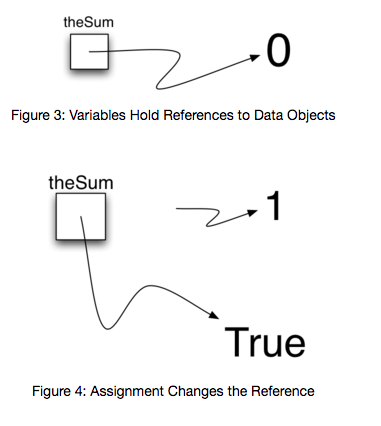

## Built-in Collection Data Types
Lists, strings, and tuples are ordered collections that are very similar in general structure but have specific differences that must be understood for them to be used properly. Sets and dictionaries are unordered collections.

###### LIST
A list is an ordered collection of zero or more references to Python data objects. Lists are written as comma-delimited values enclosed in square brackets. The empty list is simply [ ]. Lists are heterogeneous, meaning that the data objects need not all be from the same class and the collection can be assigned to a variable as below. The following fragment shows a variety of Python data objects in a list.

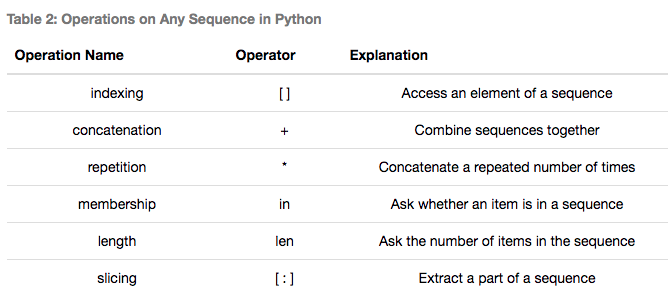

In [9]:
myList = [1,3,True,6.5]
A = [myList]*3
print(A)

[[1, 3, True, 6.5], [1, 3, True, 6.5], [1, 3, True, 6.5]]


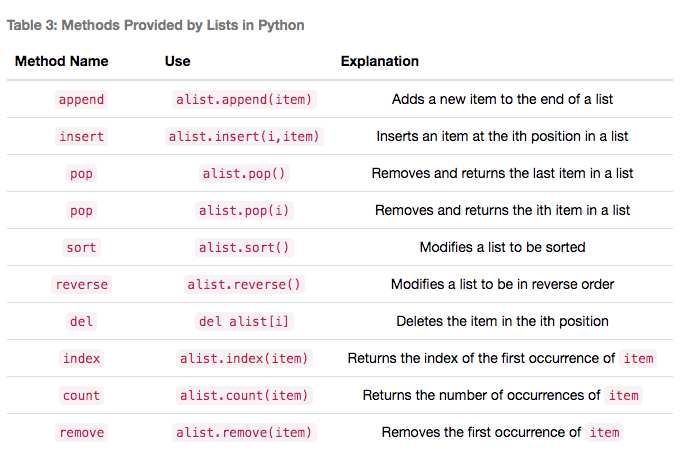

##### Strings 
are sequential collections of zero or more letters, numbers and other symbols. We call these letters, numbers and other symbols characters. Literal string values are differentiated from identifiers by using quotation marks (either single or double).
__Lists are mutable; strings are immutable.__

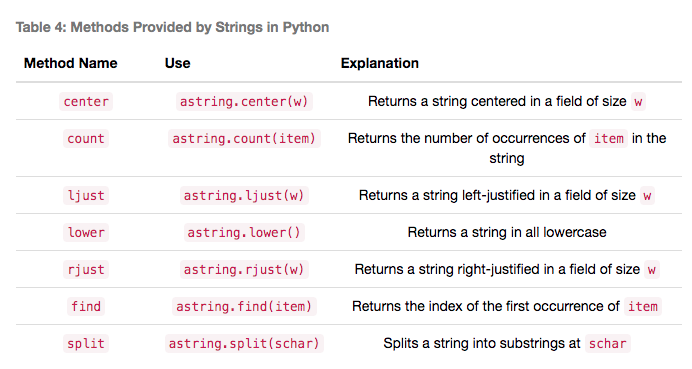

##### Tuples    >>> myTuple = (2,True,4.96)
are very similar to lists in that they are heterogeneous sequences of data. The difference is that a tuple is immutable, like a string. A tuple cannot be changed. Tuples are written as comma-delimited values enclosed in parentheses.

##### Set     >>> {3,6,"cat",4.5,False}
is an unordered collection of zero or more immutable Python data objects. Sets do not allow duplicates and are written as comma-delimited values enclosed in curly braces. The empty set is represented by set(). Sets are heterogeneous

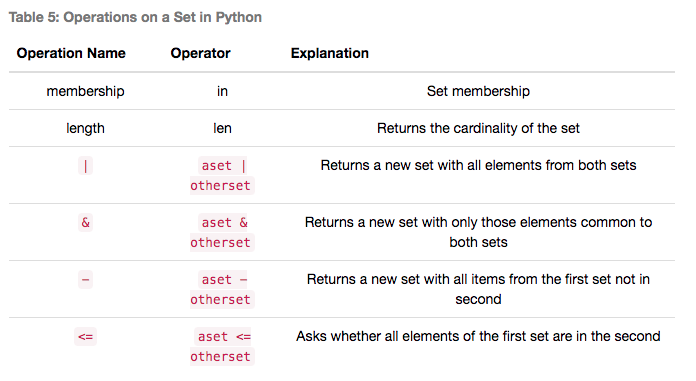

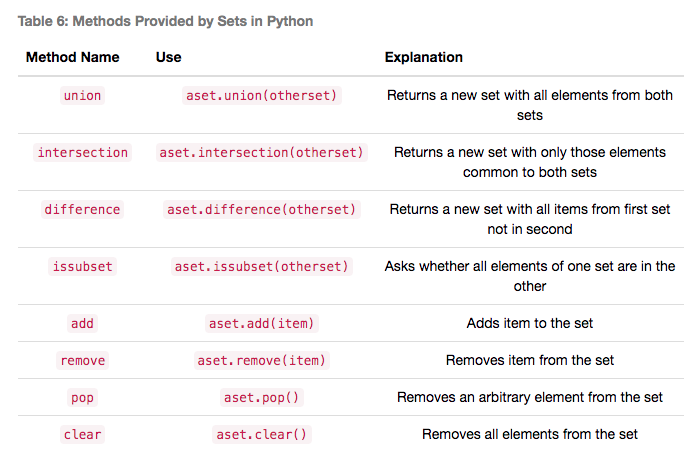

##### Dictionaries     >>> capitals = {'Iowa':'DesMoines','Wisconsin':'Madison'}
are collections of associated pairs of items where each pair consists of a key and a value. This key-value pair is typically written as key:value. Dictionaries are written as comma-delimited key:value pairs enclosed in curly braces.

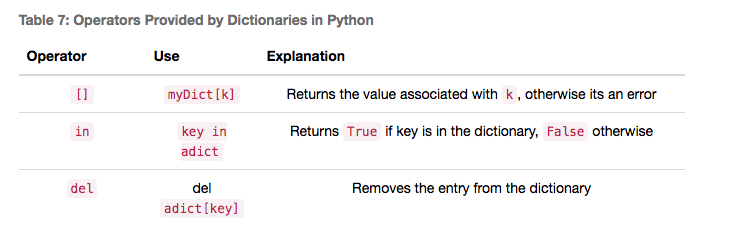

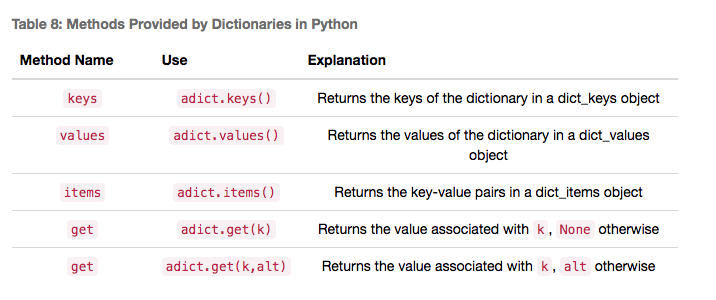

### String Formatting

In [5]:
aName="bao"
age = 1
print(aName, "is", age, "years old.")

bao is 1 years old.


In [6]:
print("%s is %d years old." % (aName, age))

bao is 1 years old.


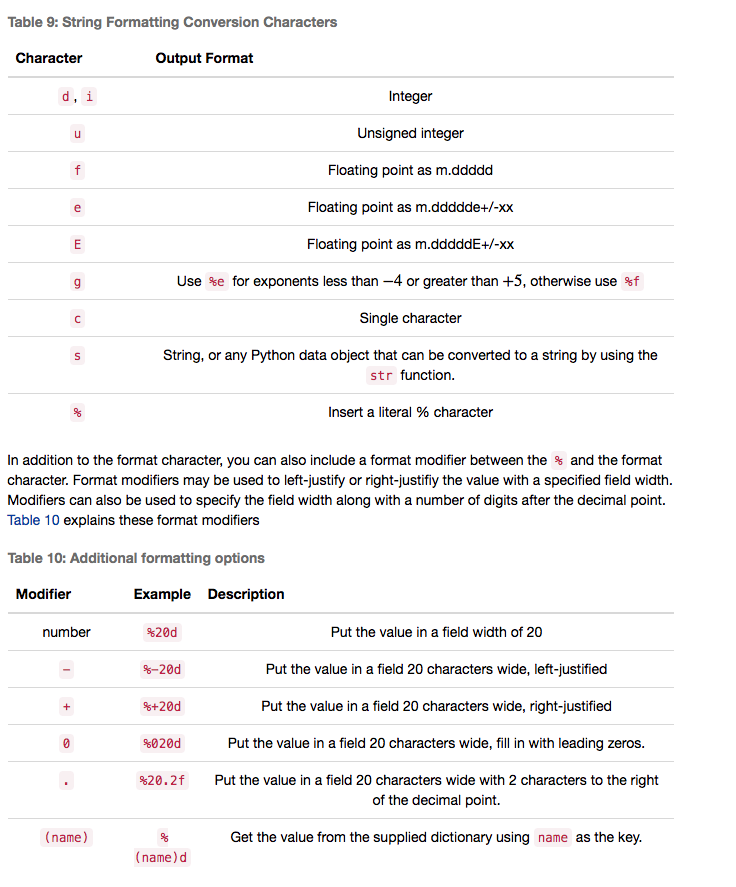

## CLASS
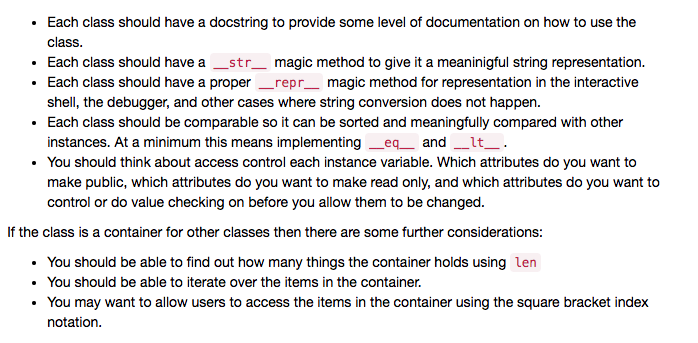

In [32]:
import random

class MSDie:
    """
    Multi-sided die

    Instance Variables:
        current_value
        num_sides

    """

    def __init__(self, num_sides):
        self.num_sides = num_sides
        self.current_value = self.roll()

    def roll(self):
        self.current_value = random.randrange(1,self.num_sides+1)
        return self.current_value

    def __str__(self):
        return str(self.current_value)

    def __repr__(self):
        return "MSDie({}) : {}".format(self.num_sides, self.current_value)


my_die = MSDie(6)
for i in range(5):
    print(my_die)
    my_die.roll()

d_list = [MSDie(6), MSDie(20)]
print(d_list)

6
2
2
1
3
[MSDie(6) : 5, MSDie(20) : 18]


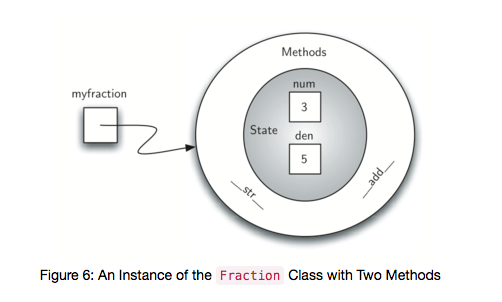

In [22]:
class Fraction:
    def __init__(self,top,bottom):
        self.num = top
        self.den = bottom
        
    def show(self):
        print(self.num,"/",self.den)
        
    def __str__(self):
        return str(self.num)+"/"+str(self.den)
    
    def __add__(self,otherfraction):
        newnum = self.num*otherfraction.den + self.den*otherfraction.num
        newden = self.den * otherfraction.den
        return Fraction(newnum,newden)
    
#     def __eq__(self, other):
#         firstnum = self.num * other.den
#         secondnum = other.num * self.den

#         return firstnum == secondnum

In [17]:
f1 = Fraction(3,5)
f2=Fraction(1,2)
f1.show()
f3=f1+f2
print(f3)

3 / 5
11/10


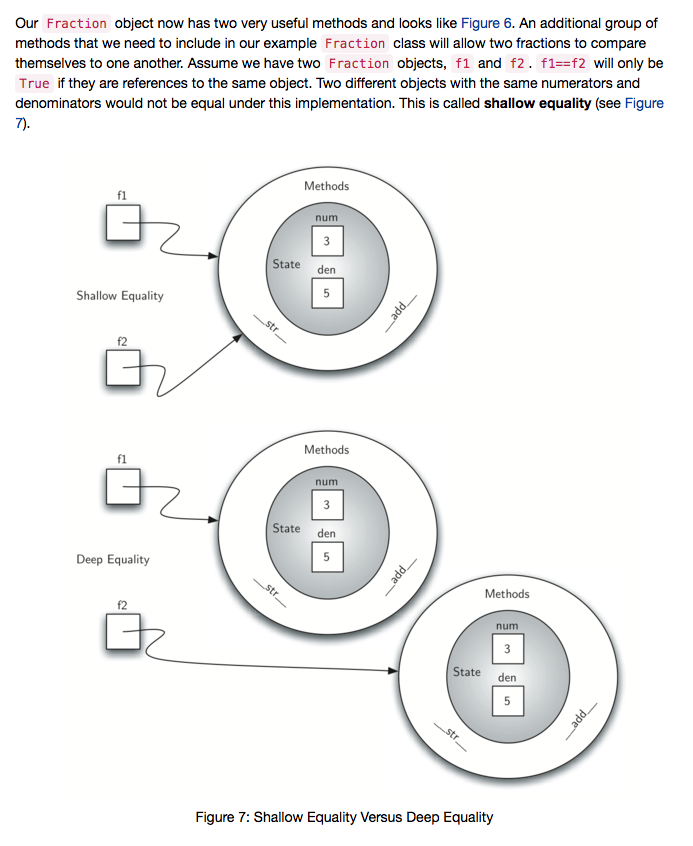

In [24]:
f1 = Fraction(3,5)
f2 = Fraction(3,5)
print(f1==f2) # shallow equality... only if ref same object
f1=f2
print(f1==f2) # deep equality by overriding __eq__

False
True


## Inheritance with example for Logic Gates and Circuit

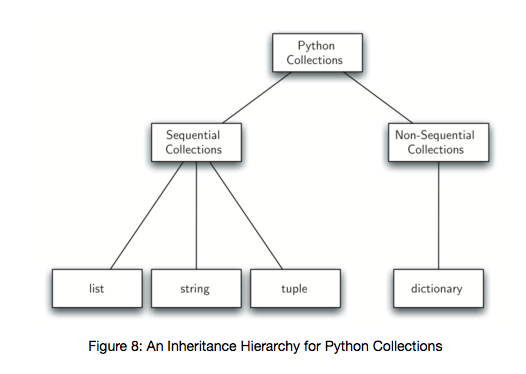

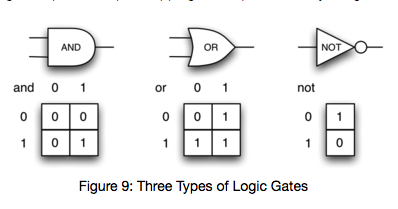

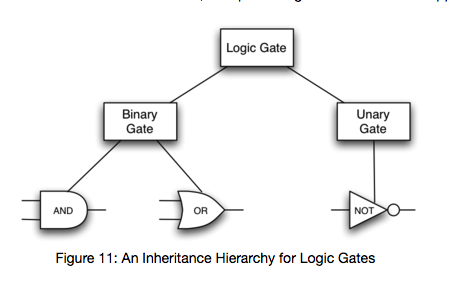

In [31]:
#PARENT OR SUPERCLASS
class LogicGate:
    def __init__(self,n):
        self.label = n
        self.output = None

    def getLabel(self):
        return self.label

    def getOutput(self):
        self.output = self.performGateLogic()
        return self.output
    
#CHILDS OR SUBCLASSES

class BinaryGate(LogicGate):

    def __init__(self,n):
        super(BinaryGate, self).__init__(n)

        self.pinA = None
        self.pinB = None

    def getPinA(self):
        if self.pinA == None:
            return int(input("Enter Pin A input for gate "+self.getLabel()+"-->"))
        else:
            return self.pinA.getFrom().getOutput()

    def getPinB(self):
        if self.pinB == None:
            return int(input("Enter Pin B input for gate "+self.getLabel()+"-->"))
        else:
            return self.pinB.getFrom().getOutput()

    def setNextPin(self,source):
        if self.pinA == None:
            self.pinA = source
        else:
            if self.pinB == None:
                self.pinB = source
            else:
                print("Cannot Connect: NO EMPTY PINS on this gate")


class AndGate(BinaryGate):

    def __init__(self,n):
        BinaryGate.__init__(self,n)

    def performGateLogic(self):

        a = self.getPinA()
        b = self.getPinB()
        if a==1 and b==1:
            return 1
        else:
            return 0

class OrGate(BinaryGate):

    def __init__(self,n):
        BinaryGate.__init__(self,n)

    def performGateLogic(self):

        a = self.getPinA()
        b = self.getPinB()
        if a ==1 or b==1:
            return 1
        else:
            return 0

        
        
        
class UnaryGate(LogicGate):

    def __init__(self,n):
        LogicGate.__init__(self,n)

        self.pin = None

    def getPin(self):
        if self.pin == None:
            return int(input("Enter Pin input for gate "+self.getLabel()+"-->"))
        else:
            return self.pin.getFrom().getOutput()

    def setNextPin(self,source):
        if self.pin == None:
            self.pin = source
        else:
            print("Cannot Connect: NO EMPTY PINS on this gate")


class NotGate(UnaryGate):

    def __init__(self,n):
        UnaryGate.__init__(self,n)

    def performGateLogic(self):
        if self.getPin():
            return 0
        else:
            return 1


class Connector:

    def __init__(self, fgate, tgate):
        self.fromgate = fgate
        self.togate = tgate

        tgate.setNextPin(self)

    def getFrom(self):
        return self.fromgate

    def getTo(self):
        return self.togate


def main():
   g1 = AndGate("G1")
   g2 = AndGate("G2")
   g3 = OrGate("G3")
   g4 = NotGate("G4")
   c1 = Connector(g1,g3)
   c2 = Connector(g2,g3)
   c3 = Connector(g3,g4)
   print(g4.getOutput())

main()

Enter Pin A input for gate G1-->1
Enter Pin B input for gate G1-->0
Enter Pin A input for gate G2-->1
Enter Pin B input for gate G2-->1
0


In [30]:
g1 = AndGate("G1")
g1.getOutput()

Enter Pin A input for gate G1-->1
Enter Pin B input for gate G1-->1


1